# Second Midterm
Dravin Flores

---



## Part 1: The inverse square law

> ### A.

We have the attractive potential

$$
    V(r) = - \frac{\alpha}{r}
$$

Where we can find the analytic solution as

$$
    r(\phi) = \frac{c}{1 + \epsilon \cos{\phi}}
$$

Where 
$$
c = \frac{L^2}{\mu \alpha}, \quad \alpha = G m_E m_S
$$

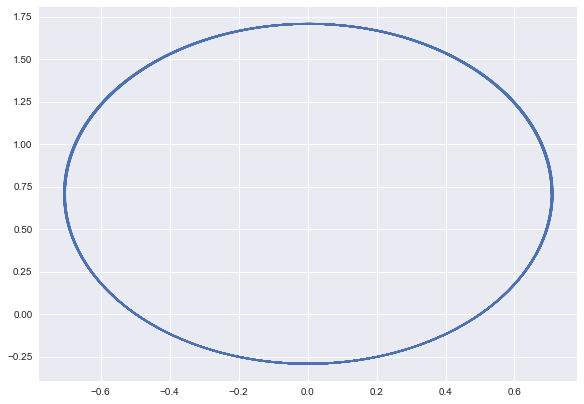

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import math

def calculate_velocity_verlet(dim=2, dt=0.001, tf=10, ti=0, r0=0, v0=0):
    # We need to know how many intervals to calculate.
    n = math.ceil( (tf - ti) / dt)

    # Just in-case we ever want to choose default values.
    if type(r0) is int:
        r0 = np.zeros((1, dim), dtype=float)
    if type(v0) is int:
        v0 = np.zeros((1, dim), dtype=float)

    # These are the arrays that will store our data.
    t = np.zeros(n)
    r = np.zeros((n, dim), dtype=float)
    v = np.zeros((n, dim), dtype=float)
    E = np.zeros((n, 1), dtype=float)
    L = np.zeros((n, dim), dtype=float)
    
    # This constant is used in the calculations below. Heavily. Thus, it is
    # easier to just define it now.
    K = 4 * math.pi * math.pi
    
    # Mass of the Earth in solar masses.
    m_e = (3.0027E-6)

    # Setting up the initial position and velocity vectors.
    r[0] = r0
    v[0] = v0
    E[0] = (0.5 * m_e * np.linalg.norm(v[0])**2) + (-K * m_e)/(np.linalg.norm(r[0]))
    L[0] = np.cross((m_e) * v[0], r[0]) 

    for i in range(n - 1):
        r_mag = math.sqrt(sum(r[i]*r[i]))
        a = (-K * r[i]) / (r_mag ** 3)
        
        r[i+1] = r[i] + v[i]*dt + 0.5*a * (dt ** 2)
        r_mag = math.sqrt(sum(r[i+1]*r[i+1]))
        ap = (-K * r[i+1]) / (r_mag ** 3)
        
        v[i+1] = v[i] + 0.5*(a + ap)*dt
        t[i+1] = t[i] + dt
        
        # We have to make sure we do not divide by zero.
        E[i+1] = E[0] + (0.5 * m_e * np.linalg.norm(v[i])**2) + (-K * m_e)/(np.linalg.norm(r[i]))
        L[i+1] = L[0] + np.cross((m_e) * v[i], r[i]) 
        
    return (t, r, v, E, L)

r0 = np.array([math.sqrt(0.5), math.sqrt(0.5)])
v0 = np.array([0.00, 2 * math.pi])

(t, r, v, E, L) = calculate_velocity_verlet(r0=r0, v0=v0)
(fig, ax) = plt.subplots(constrained_layout = True)
ax.plot(r[:, 0], r[:, 1])
plt.show()

To choose the initial conditions, we simply have to make sure that we keep three facts in mind:
1. The we must choose an initial position such that $r = \sqrt{x^2 + y^2} = 1$
2. The initial velocity is chosen such that we can retain a constant radius
3. The magnitude of the initial velocity must be less than the escape velocity $v_{\text{esc}} = \sqrt{\frac{2GM}{r_0}} = \sqrt{\frac{8 \pi^2}{r_0}}$

We can also plot the function $r(\phi)$ directly.

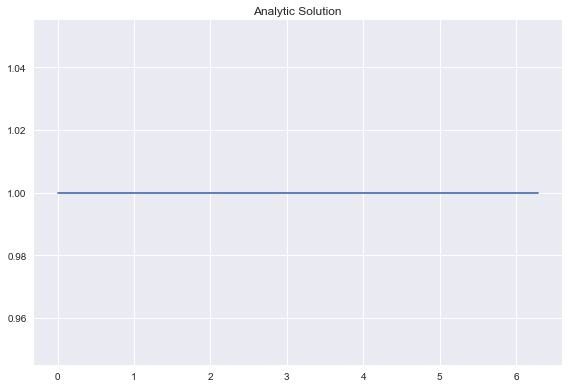

In [104]:
c = 1
e = 0
phi = np.linspace(0, 2*math.pi, 100)
r = c / (1 + e*np.cos(phi))

(fig, ax) = plt.subplots(tight_layout=True)
ax.plot(phi, r)
ax.set_title("Analytic Solution")
plt.show()

This makes sense as we would expect that with an eccentricity as $\epsilon = 0$, that the radius of the object in orbit would be constant.

If we want to obtain a circular orbit, we simply have to make sure that $\epsilon = 0$.

> ### B.

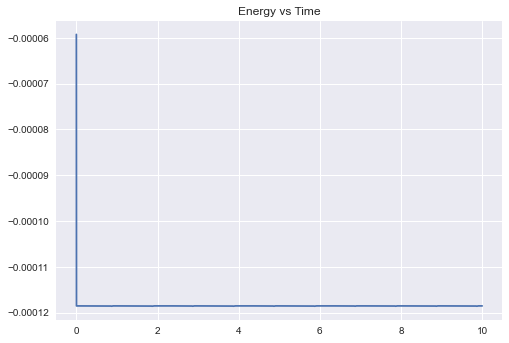

In [126]:
plt.plot(t, E)
plt.title("Energy vs Time")
plt.show()

We expect that, because the radius of the orbit remains constant, that $\epsilon = 1$. We can then use the following equation

$$
    E = \frac{\gamma^2 \mu}{2 L^2} \left( \epsilon^2 - 1 \right)
$$

We immediately see that the energy of the system is constant if

$$
    \frac{\gamma^2 \mu}{2 L^2} = \text{const.}
$$

We know that this is indeed a constant as the radius of the object remains constant.

> ### C.

The angular acceleration of the system can be found as 

$$
    L = m r^2 \omega, \quad \omega = \dot{\phi}
$$

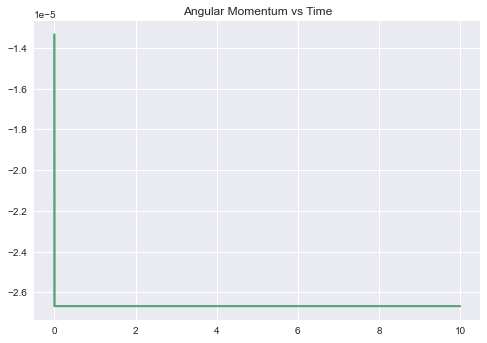

In [127]:
plt.plot(t, L)
plt.title("Angular Momentum vs Time")
plt.show()

We know for a fact that a line drawn from the center to any point on the circle, sweeping out a particular area over time, will be constant because it is a circle. However, we can also show this as

$$
    \frac{dA}{dt} = \frac{L}{2m}
$$

Given that the angular momentum is constant, this rate $\frac{dA}{dt}$ will also be constant. This is directly in line with the conservation of momentum as if $\frac{dA}{dt}$ is constant, then so is $L$

> ### D.

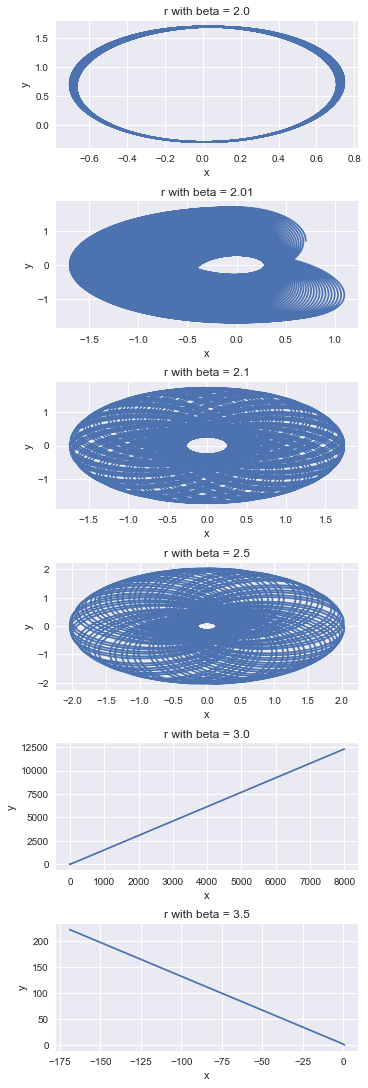

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import math

def F(r, beta):
    K = 4 * math.pi**2
    m_e = (3.0027E-6)
    return (-K * m_e) / (np.linalg.norm(r))**beta


def get_acceleration(r, beta):
    K = 4 * math.pi**2
    return (-K)/(r)**beta


def calculate_euler_cromer(dim=2, dt=0.001, tf=100, ti=0, r0=0, v0=0, beta=1):
    # We need to know how many intervals to calculate.
    n = math.ceil( (tf - ti) / dt)

    # These are the arrays that will store our data.
    t = np.zeros(n)
    r = np.zeros((n, dim), dtype=float)
    v = np.zeros((n, dim), dtype=float)
    
    K = 4 * math.pi * math.pi
    
    # Setting up the initial position and velocity vectors.
    r[0] = r0
    v[0] = v0

    for i in range(n - 1):
        r_mag = np.linalg.norm(r[i])
        a = (-K / r_mag**beta) * (r[i])/(r_mag)
        
        v[i+1] = v[i] + a*dt
        r[i+1] = r[i] + v[i+1]*dt
        t[i+1] = t[i] + dt
        
    return r

r0 = np.array([math.sqrt(0.5), math.sqrt(0.5)])
v0 = np.array([0.00, 2 * math.pi])
beta_list = np.array([2.00, 2.01, 2.10, 2.50, 3.00, 3.50])

r_list = list()

for b in beta_list:
    r_list.append(calculate_euler_cromer(r0=r0, v0=v0, beta=b))

# r_list = np.array(r)
# print(r_list)

plt.style.use('seaborn')
plt.style.context('poster')


(fig, ax) = plt.subplots(nrows=beta.size, ncols=1, constrained_layout=True, figsize=(5, 15))
# plt.rcParams['figure.figsize'] = (10, 3)

i = 0
for r in r_list:
    ax[i].plot(r[:, 0], r[:, 1])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title("r with beta = " + str(beta_list[i]))
    # ax[i].axis('scaled')
    i += 1
    
i = 0
plt.show()

Well, from what we can see from above, it appears that the further the $\beta$ value is from 2, the more unstable the orbit appears to be. From what we can see, it would appear that the ideal $\beta$ would be $\beta \in [2, 3)$. As for whether or not we can use the orbit of the planets to ascertain this beta value, we should be able to. By viewing just how much the orbit of the planet deviates from a circle, we should be able to piece together a rough idea for what $\beta$ could possibly have created it.

> ### E.

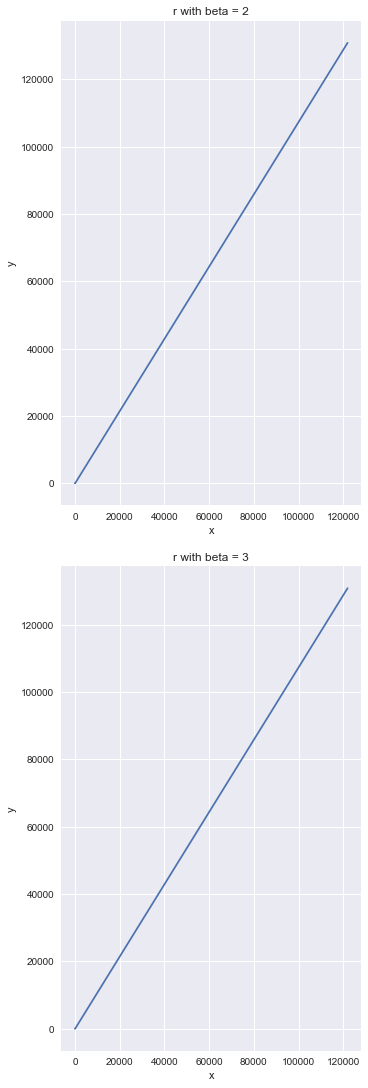

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import math

def calculate_velocity_verlet(dim=2, dt=0.001, tf=100, ti=0, r0=0, v0=0, beta=2):
    # We need to know how many intervals to calculate.
    n = math.ceil( (tf - ti) / dt)

    # Just in-case we ever want to choose default values.
    if type(r0) is int:
        r0 = np.zeros((1, dim), dtype=float)
    if type(v0) is int:
        v0 = np.zeros((1, dim), dtype=float)

    # These are the arrays that will store our data.
    t = np.zeros(n)
    r = np.zeros((n, dim), dtype=float)
    v = np.zeros((n, dim), dtype=float)
    E = np.zeros((n, 1), dtype=float)
    L = np.zeros((n, dim), dtype=float)
    
    # This constant is used in the calculations below. Heavily. Thus, it is
    # easier to just define it now.
    K = 4 * math.pi * math.pi
    
    # Mass of the Earth in solar masses.
    m_e = (3.0027E-6)

    # Setting up the initial position and velocity vectors.
    r[0] = r0
    v[0] = v0
    E[0] = (0.5 * m_e * np.linalg.norm(v[0])**2) + (-K * m_e)/(np.linalg.norm(r[0]))
    L[0] = np.cross((m_e) * v[0], r[0]) 

    for i in range(n - 1):
        r_mag = np.linalg.norm(r[i])
        a = (-K / r_mag**beta) * (r[i])/(r_mag)
        
        r[i+1] = r[i] + v[i]*dt + 0.5*a * (dt ** 2)
        r_mag = np.linalg.norm(r[i+1])
        ap = (-K / r_mag**beta) * (r[i+1])/(r_mag)
        
        v[i+1] = v[i] + 0.5*(a + ap)*dt
        t[i+1] = t[i] + dt
        
        # We have to make sure we do not divide by zero.
        E[i+1] = E[0] + (0.5 * m_e * np.linalg.norm(v[i])**2) + (-K * m_e)/(np.linalg.norm(r[i]))
        L[i+1] = L[0] + np.cross((m_e) * v[i], r[i]) 
        
    return (t, r, v, E, L)

r0 = np.array([math.sqrt(0.5), math.sqrt(0.5)])
v0 = np.array([0, 5])
beta_list = np.array([2, 3])

r_list = list()
E_list = list()
L_list = list()
for i in [0, 1]:
    (t, r, v, E, L) = calculate_velocity_verlet(r0=r0, v0=v0, beta=b)
    r_list.append(r)
    E_list.append(E)
    L_list.append(L)

plt.style.use('seaborn')
plt.style.context('poster')

(fig, ax) = plt.subplots(nrows=beta_list.size, ncols=1, constrained_layout=True, figsize=(5, 15))
# plt.rcParams['figure.figsize'] = (10, 3)

i = 0
for r in r_list:
    ax[i].plot(r[:, 0], r[:, 1])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title("r with beta = " + str(beta_list[i]))
    # ax[i].axis('scaled')
    i += 1
    
i = 0
plt.show()

## Part 2: Program for the solar system
 
We can use the following equation to find the sum of the forces exerted on the planet $i$ by the other $N$ planets.

$$
    m_i \cdot \mathbf{r}_{i} = m_i \cdot \sum_{j = 1 \\ j \ne i}^{N} - \frac{G m_j}{\| \mathbf{r}_i - \mathbf{r}_j \|^3} \left( \mathbf{r}_i - \mathbf{r}_j \right)
$$

In which case we can state that the acceleration is

$$
    \mathbf{r}_{i} = \sum_{j = 1 \\ j \ne i}^{N} - \frac{G m_j}{\| \mathbf{r}_i - \mathbf{r}_j \|^3} \left( \mathbf{r}_i - \mathbf{r}_j \right)
$$

Which means we can set up the following equations

$$
    \frac{d \mathbf{r}_i}{dt} = \mathbf{v}_i \\
    \frac{d \mathbf{v}_i}{dt} = \sum_{j \ne i}^{N} - \frac{G m_j}{\| \mathbf{r}_i - \mathbf{r}_j \|^3} \left( \mathbf{r}_i - \mathbf{r}_j \right)
$$

We're going to scale the equations by stating that

$$
    G m_S = 4 \pi^2 \frac{\text{AU}^3}{\text{yr}^2}
$$

This means that we can define the following

$$
    G = 4 \pi^2 \frac{\text{AU}^3}{\text{yr}^2 \ \text{m}_\text{S}}
$$

We can define the constant $K$ as 

$$
    K = 4 \pi^2 \frac{\text{AU}^3}{\text{yr}^2 \ \text{m}_\text{S}}
$$

Which means our system appears as

$$
    \frac{d \mathbf{r}_i}{dt} = \mathbf{v}_i \\
    \frac{d \mathbf{v}_i}{dt} = \sum_{j \ne i}^{N} - \frac{K m_j'}{\| \mathbf{r}_i - \mathbf{r}_j \|^3} \left( \mathbf{r}_i - \mathbf{r}_j \right)
$$

Where

$$
    m_j' = \frac{m_j}{m_S}
$$

In [2]:
################################################################################
#   Optional Dependency Install:
#       The following code will install the astroquery python library, which
#   acts as the Python interface for NASA's JPL Horizons system. This is a
#   really neat library that allows for us to easily import the initial
#   conditions for the position and velocity of the planets. It also allows us
#   to easily change what particular data we wish to see (e.g. if we wanted to,
#   we could gather the positions of the planets from the Barycenter of the 
#   solar system).
#       If you would like to not install the package, simply set the
#   'install_package' flag to False. Otherwise, it will install.
################################################################################

install_package = True

if install_package:
    %pip install astroquery
else:
    # The initial position in units AU.
    initial_positions = np.array([
        # Sun
        np.array([0.00, 0.00, 0.00]),

        # Mercury
        np.array([
            3.122793983389069E-01, 
            -2.598220939067843E-01, 
            -4.987794777669086E-02
        ]),

        # Venus
        np.array([
            -7.174876425073317E-01, 
            4.090345156655566E-02, 
            4.196515383542541E-02
        ]),

        # Earth
        np.array([
            -8.930797281554521E-01, 
            -4.583975921064413E-01, 
            2.553229665947301E-05
        ]),

        # Mars
        np.array([
            -5.784491653206079E-03, 
            -1.455496688227711E+00, 
            -3.035592179952467E-02
        ]),

        # Jupiter
        np.array([
            1.311107011479092E+00, 
            -5.019947678877836E+00, 
            -8.484178955399808E-03
        ]),

        # Saturn
        np.array([
            4.310914940663537E+00, 
            -9.048205082721644E+00, 
            -1.427435262110195E-02
        ]),

        # Uranus
        np.array([
            1.597798773184237E+01, 
            1.170164102181773E+01, 
            -1.634970417523974E-01
        ]),

        # Neptune
        np.array([
            2.931100084828251E+01, 
            -6.036315954320705E+00, 
            -5.512824477268721E-01
        ])
    ])

    # The initial velocity in units AU/d.
    initial_velocities = np.array([
        # Sun
        np.array([0.00, 0.00, 0.00]),

        # Mercury
        np.array([
            1.243676190551533E-02, 
            2.294228111356715E-02, 
            7.338437092018703E-04
        ]),

        # Venus
        np.array([
            -1.265521581423989E-03, 
            -2.028244174723526E-02, 
            -2.052803480536594E-04
        ]),

        # Earth
        np.array([
            7.571450123730557E-03, 
            -1.537561391211393E-02, 
            1.103373872282015E-06
        ]),

        # Mars
        np.array([
            1.452234550605374E-02, 
            1.147778228075310E-03, 
            -3.322370007187833E-04
        ]),

        # Jupiter
        np.array([
            7.218059743183974E-03, 
            2.266414492175837E-0, 
            -1.708540558619554E-04
        ]),

        # Saturn
        np.array([
            4.735946148236742E-03, 
            2.386091308893279E-03, 
            -2.298101869325023E-04
        ]),

        # Uranus
        np.array([
            -2.346084441409485E-03, 
            2.991917505941600E-03, 
            4.131101815367663E-05
        ]),

        # Neptune
        np.array([
            6.194728146694537E-04, 
            3.096303627969980E-03, 
            -7.778426259215158E-05
        ])
    ])

Note: you may need to restart the kernel to use updated packages.


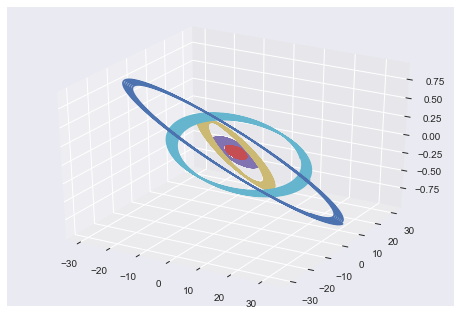

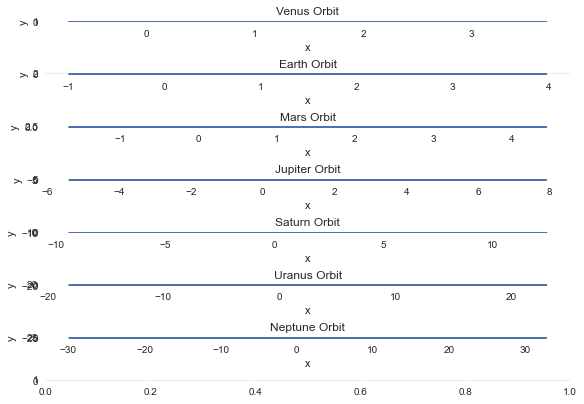

In [10]:
################################################################################
#   Bugs Encountered:
#       For some odd reason, the orbit of Mercury completely messes up the
#   entire program. This might have something to do with the rather eccentric
#   orbit of Mercury, however it is extremely odd that it would mess up the
#   simulation of all the other planets. There likely is no fix, other than
#   skipping the motion of Mercury entirely. Sorry.
#
#       As for this program, the multidimensional arrays are really a pain to
#   deal with. The comments in the code will help alleviate some of the pain.
#   However, it seems that most bugs encountered were fixed with proper indexing
#   and comments to highlight exactly what was going on. Of course, Numpy takes
#   away so much of the pain of dealing with multidimensional arrays, so that is
#   a plus.
#
################################################################################

# The main libraries used.
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np 
import math
%matplotlib inline

try:
    if install_package:
        use_library = True
        from astroquery.jplhorizons import Horizons
    else:
        use_library = False
except:
    use_library = False
    
# This is just to remove all the print statements used for debugging purposes.
debug_flag = False

def solve(m, r_0, v_0):
    tf = 1000
    ti = 0
    dt = 0.01
    n_iterations = math.ceil( (tf - ti) / dt )

    # There are 8 planets plus the sun. As well, we want to include a full
    # 3 dimension picture of the orbits of the planets.
    n_planets = 9
    n_dimensions = 3

    # Multi-dimensional arrays will help with storing all the data. In this case
    # we can access the array as r[i][j][k], where
    # i => Select the position of an individual planet
    # j => Select a particular discrete position
    # k => Select the individual x, y, z component
    t = np.zeros(n_iterations, dtype=float)
    r = np.zeros((n_planets, n_iterations, n_dimensions), dtype=float)
    v = np.zeros((n_planets, n_iterations, n_dimensions), dtype=float)

    # We want to set the initial position and velocity vectors using the initial
    # position and velocities arrays passed in.
    for p in range(n_planets):
        r[p][0] = r_0[p]
        v[p][0] = v_0[p]

    # Our scaled gravitational constant.
    K = 4 * math.pi * math.pi

    # This constant will ensure that we do not have any division-by-zero errors.
    e = 1.00E-5

    # It should be noted that the scaled masses were passed in. By scaled
    # masses, it means in terms of solar masses (i.e. we divide each planet's
    # mass by the mass of the sun). This is done outside of the program.

    for n in range(n_iterations - 1):
        # We need to calculate the acceleration for each planet (and the sun).

        # We will need an array of acceleration vectors. We define it in the
        # loop as it will be different upon every calculation.
        a = np.zeros((n_planets, n_dimensions), dtype=float)
        ap = np.zeros((n_planets, n_dimensions), dtype=float)

        for i in range(n_planets):
            for j in range(n_planets):
                # We want the net acceleration of the ith planet. This means we
                # must add up the accelerations due to the jth planet. But we
                # must make sure that we do not include the acceleration on the
                # ith planet by the ith planet itself, because that's silly.
                if j != i:
                    vec_ij = r[i][n] - r[j][n]
                    mag_ij = np.linalg.norm(vec_ij)
                    a[i] += -K * m[j] * vec_ij/(mag_ij**3)

                    # We don't need an else case as our acceleration array of 
                    # vectors is already initialized to 0.

        # We can set the position of the ith planet here.
        for i in range(n_planets):
            r[i][n+1] = r[i][n] + v[i][n]*dt + 0.5*a[i]*(dt**2)

        # We want to now recalculate the accleration as per the velocity-verlet
        # method, however we will calculate the (i+1)th acceleration vector.
        for i in range(n_planets):
            for j in range(n_planets):
                if j != i:
                    vec_ij = r[i][n+1] - r[j][n+1]
                    mag_ij = np.linalg.norm(vec_ij)
                    ap[i] += -K * m[j] * vec_ij/(mag_ij**3)
        
        # Now we can calculate the velocity of the ith planet.
        for i in range(n_planets):
            v[i][n+1] = v[i][n] + 0.5*(a[i] + ap[i])*dt

        # There really is not a need for the time array to be discretized,
        # considering our position, velocity, and acceleration vectors are not
        # dependent upon time. However, it is kept in just for the fun of it.
        t[n+1] = t[n] + dt

    return r

celestial_bodies = [
    "Sun",
    "Mercury",
    "Venus",
    "Earth",
    "Mars",
    "Jupiter",
    "Saturn",
    "Uranus",
    "Neptune"
]

# These are the masses of the planets, unscaled; these masses are in units of
# kilograms.
masses = np.array([
    2.00E+30,
    3.30E+23,
    4.90E+24,
    6.00E+24,
    6.60E+24,
    1.90E+27,
    5.50E+26,
    8.80E+25,
    1.03E+26
])

# These masses are multiples of the mass of the sun.
relative_masses = (1/2.00E+30) * masses

if use_library:
    initial_positions = list()
    initial_velocities = list()
    for planet_id in range(99, 999, 100):
        # First iteration means we're dealing with the sun.
        if planet_id == 99:
            r = np.array([0.00, 0.00, 0.00])
            v = np.array([0.00, 0.00, 0.00])

            initial_positions.append(r)
            initial_velocities.append(v)
        else:
            planet = \
                Horizons(id=planet_id, location='@sun', id_type='id').vectors()

            r = np.array([
                np.double(planet['x']),
                np.double(planet['y']),
                np.double(planet['z'])
            ])

            v = np.array([
                np.double(planet['vx']),
                np.double(planet['vy']),
                np.double(planet['vz'])
            ])

            initial_positions.append(r)
            initial_velocities.append(v)

    # Just to make it a little bit faster to deal with.
    initial_positions = np.array(initial_positions)
    initial_velocities = np.array(initial_velocities)

if debug_flag:
    print(initial_positions)
    print()
    print(initial_velocities)
    print()
    print(relative_masses)

r = solve(relative_masses, initial_positions, 365*initial_velocities)

plt.style.use('seaborn')
plt.style.context('poster')

if debug_flag:
    for planet in range(9):
        print(f"{round(np.linalg.norm(r[planet][-1]), 2)} AU")

# This creates a 3D image of the revolution.
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(2, 9):
    if i != 1:
        ax.plot3D(r[i][:, 0], r[i][:, 1], r[i][:, 2])

# For the two dimensional look; this is only the xy-plane.        
(fig, ax) = plt.subplots(nrows=8, ncols=1, constrained_layout=True)
for i in range(2, 9):
    ax[i-2].plot(r[i][:, 0], r[i][:, 1])
    ax[i-2].set_xlabel('x')
    ax[i-2].set_ylabel('y')
    ax[i-2].set_title(celestial_bodies[i] + " " + "Orbit")
        
plt.show()

## Results

Well, with the proper differential equation solver, we can see the elliptical orbits of the planets. It seems that the orbit of the planets, at least from what the velocity-verlet method calculated, is not completely stable. The radial distance from the sun to the planet seems to vary quite a bit, with the path of the planet changing at time moves forward. We can see this as the thickness of the orbit changes; essentially, the planets are in a slightly different position at the same time relative to their orbits This seems to suggest that, given enough time, the orbits of the planets will become destabilized.

We can also see that the planets furthest from the sun experience a lot more stability in their plotted orbits as they have experienced fewer orbits than the inner planets; it is difficult to see the paths of the inner planets due to this instability. This effect is likely heightened by the velocity-verlet method as we know that it loses accuracy as time moves forward.